Create a contour plot in python which scans through x-axis (domestic renewable share) and y-axis (hydrogen export volume).  In the z-axis there is a synergy/conflict indicator called domestic average system costs

In [92]:
OUTPUT='/mnt/c/Users/scl38887/Documents/git/aldehyde/results/graphics/integrated_comp/'

### Real data

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
# Get the data
data = pd.read_csv('/mnt/c/Users/scl38887/Documents/git/aldehyde/results/integrated_comp/stats.csv')

# Prepare the data
# Extract the Co2L which is in position 5-8
data["sopts"] = data["sopts"].str[6:8]

#Rescale the cost from euro to B€
data["cost"] = (data["cost"]/1e9).round(2)

#Round the LCOH to 2 decimals
data["lcoh"] = data["lcoh"].round(2)

In [95]:
# Shape the data in a way that is suitable for contour plotting
# First, get the unique values of the two parameters
y = np.unique(data['h2export'])
x = np.unique(data['sopts'])

# Then, create a meshgrid of the two parameters
#X, Y = np.meshgrid(x, y) # Not necessary

# Finally, create a matrix of the cost values for each combination of parameters
cost = data['cost'].values.reshape(len(x), len(y)).T
lcoh = data['lcoh'].values.reshape(len(x), len(y)).T

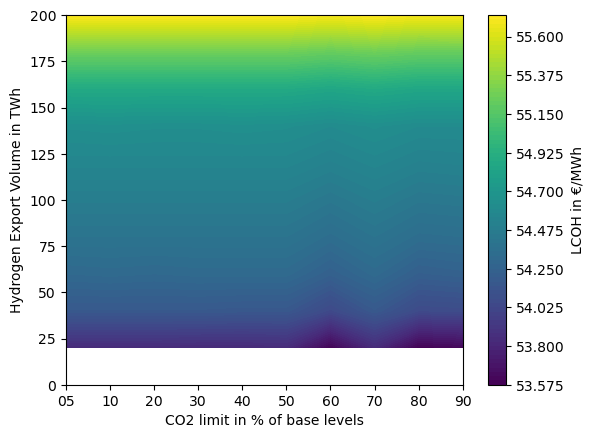

In [96]:
# Plot a contour plot of the data having the y-axis the column "h2export", x-axis the column "sopts", and the z-axis the column "lcoh"
plt.contourf(x,y,lcoh, levels=100)
plt.xlabel('CO2 limit in % of base levels')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.colorbar().set_label('LCOH in €/MWh')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_lcoh.pdf', bbox_inches='tight')

plt.show()

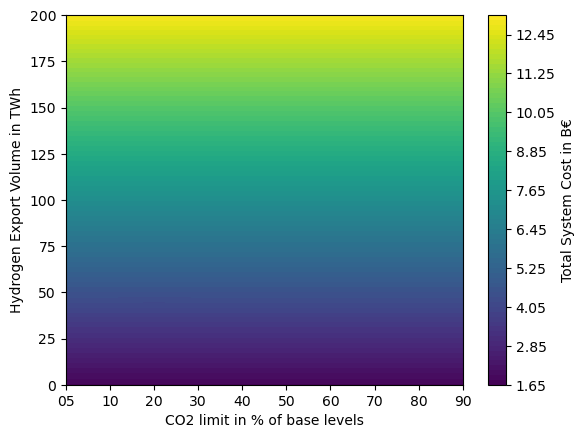

In [97]:
# Plot a contour plot of the data having the y-axis the column "h2export", x-axis the column "sopts", and the z-axis the column "cost"
plt.contourf(x,y,cost, levels=100)
plt.xlabel('CO2 limit in % of base levels')
plt.ylabel('Hydrogen Export Volume in TWh')
#plt.title('Synergy [abs(X**0.6 - Y*0.1) +20]')
plt.colorbar().set_label('Total System Cost in B€')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_totalsystemcost.pdf', bbox_inches='tight')

plt.show()

### Dummy data: Single plot

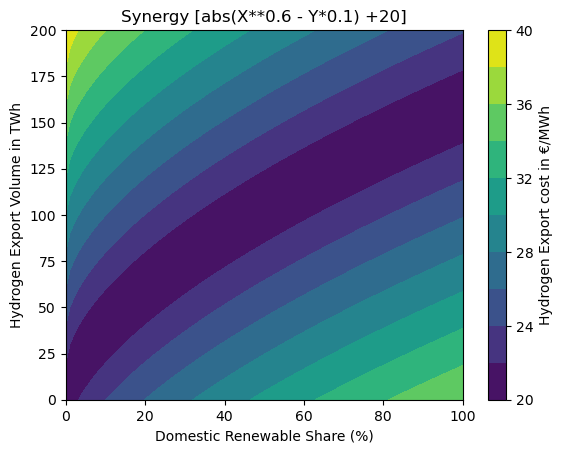

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y axis data
x = np.linspace(0, 100, num=100)
y = np.linspace(0, 200, num=100)

# Generate grid for x and y data
X, Y = np.meshgrid(x, y)

# Define the z-axis data, this is just a dummy example
Z = abs(X**0.6 - Y*0.1) +20

# Plot the contour plot
plt.contourf(X, Y, Z, levels=10)
plt.xlabel('Domestic Renewable Share (%)')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.title('Synergy [abs(X**0.6 - Y*0.1) +20]')
plt.colorbar().set_label('Hydrogen Export cost in €/MWh')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_dummy.pdf', bbox_inches='tight')

plt.show()


### Dummay Data: Subplots

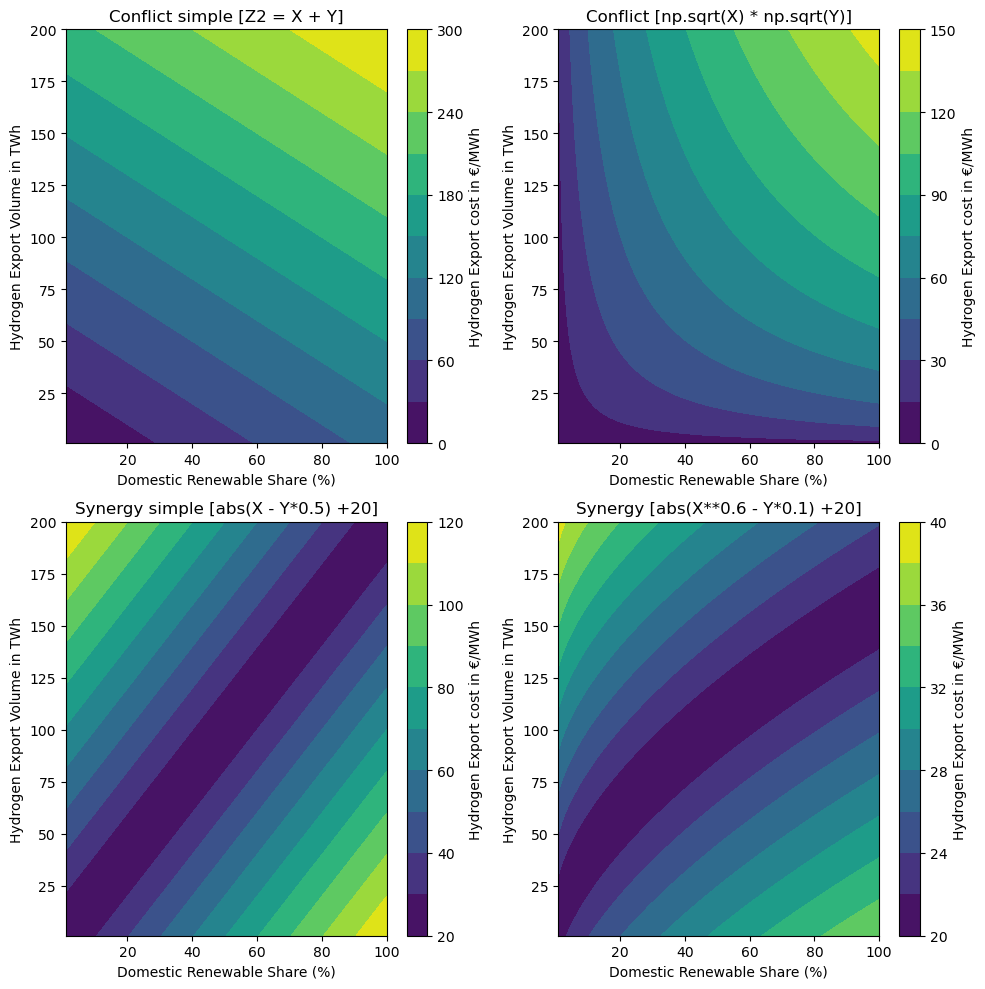

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y axis data. Start from 1 to avoid devision by zero
x = np.linspace(1, 100, num=100)
y = np.linspace(1, 200, num=100)

# Generate grid for x and y data
X, Y = np.meshgrid(x, y)

# Define the z-axis data, this is just a dummy example
Z1 = X + Y 
Z2 = np.sqrt(X) * np.sqrt(Y) 
Z3 = abs(X - Y*0.5) +20
Z4 = abs(X**0.6 - Y*0.1) +20

# Plot the 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
cax1 = axs[0, 0].contourf(X, Y, Z1, levels=10)
axs[0, 0].set_title('Conflict simple [Z2 = X + Y]')
cax2 = axs[0, 1].contourf(X, Y, Z2, levels=10)
axs[0, 1].set_title('Conflict [np.sqrt(X) * np.sqrt(Y)]')
cax3 = axs[1, 0].contourf(X, Y, Z3, levels=10)
axs[1, 0].set_title('Synergy simple [abs(X - Y*0.5) +20]')
cax4 = axs[1, 1].contourf(X, Y, Z4, levels=10)
axs[1, 1].set_title('Synergy [abs(X**0.6 - Y*0.1) +20]')

# Add colorbars
fig.colorbar(cax1, ax=axs[0, 0]).set_label('Hydrogen Export cost in €/MWh')
fig.colorbar(cax2, ax=axs[0, 1]).set_label('Hydrogen Export cost in €/MWh')
fig.colorbar(cax3, ax=axs[1, 0]).set_label('Hydrogen Export cost in €/MWh')
fig.colorbar(cax4, ax=axs[1, 1]).set_label('Hydrogen Export cost in €/MWh')

for ax in axs.flat:
    ax.set(xlabel='Domestic Renewable Share (%)', ylabel='Hydrogen Export Volume in TWh')

plt.tight_layout()
plt.savefig(OUTPUT+'contour_plot_dummy_subplots.pdf')
plt.show()
